# Name: [Mazen Mobtasem Mohamed]
## ID: [18100142]

# <center><font color=darkred>Lab 3 </font>

# Lab Goals:
    1. Quick overview of some examples in lecture2(part2).
    2. Work with hands-on examples such as:(Smoothing and sharpining spatial filtering)

# <font color=darkred size=4>1-Needed Packages

In [ ]:
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np
from skimage import img_as_ubyte,img_as_float
from skimage.util import invert
from scipy.ndimage import convolve
from skimage import exposure
from skimage.filters.rank import median, gradient
from skimage.morphology import disk
from skimage import data, io, filters
from skimage.exposure import equalize_hist
from skimage.filters.rank import median
from scipy import ndimage
from skimage.filters import laplace
from math import floor

## Image show:

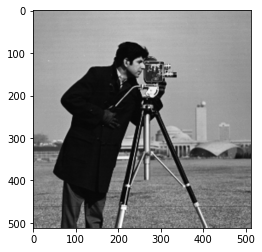

In [ ]:
img = data.camera()
plt.imshow(img,'gray',vmin=0, vmax=255 )
plt.show()

## Apply low pass filter to image:

### Low-pass filter:
    A low-pass filter, also called a "blurring" or "smoothing" filter, averages out rapid changes in intensity. The simplest low-pass filter just calculates the average of a pixel and all of its eight immediate neighbors. The result replaces the original value of the pixel. The process is repeated for every pixel in the image.

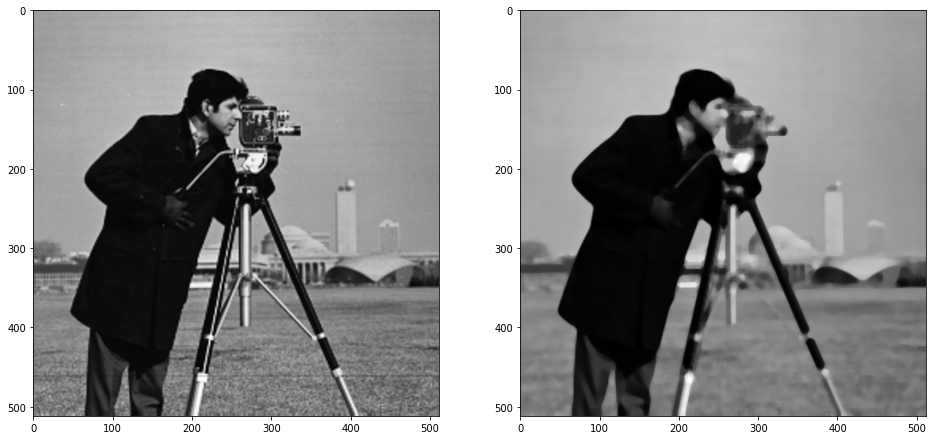

In [ ]:
ImgNew  = median(img, disk(5))
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow(img,'gray')
ax2.imshow(ImgNew,'gray')
plt.show()   

# Task 1: Implement low pass filter(mean filter) function to image by extracting the 5x5 block around each pixel then calculate the mean?

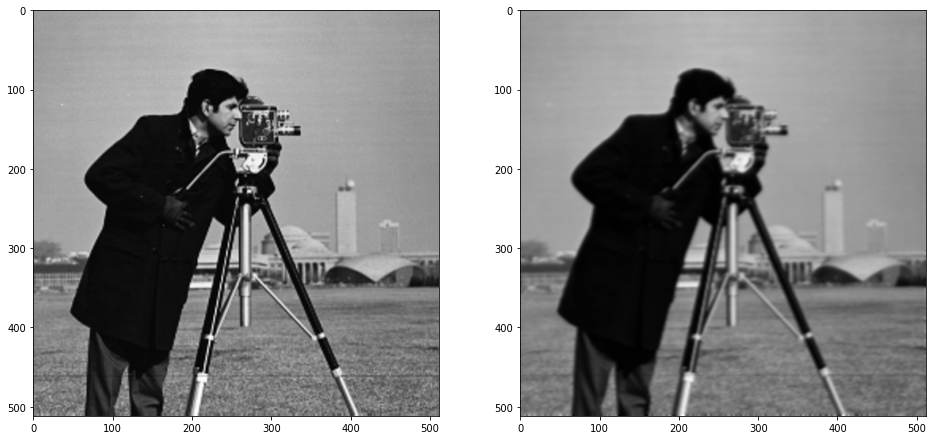

In [ ]:
def meanFilter(img):
    img1 = np.copy(img)
    for i in range(2,img1.shape[0]-2):
      for j in range(2,img1.shape[1]-2):
        sum=0
        for k in range(-2,3):
          for l in range(-2,3):
            sum += (1/25)*(img1[i+k][j+l])
        img1[i][j] = sum
    return img1 

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow(data.camera(),'gray')
ax2.imshow(meanFilter(data.camera()) ,'gray')
plt.show()  

# Apply sobel kernal filtering:

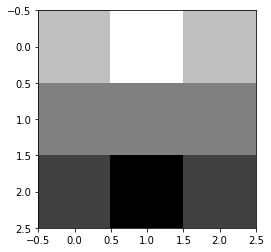

In [ ]:
horizontal_edge_kernel = np.array([[ 1,  2,  1],
                                   [ 0,  0,  0],
                                   [-1, -2, -1]])
# Use gray colormap to display negative and postive values
plt.imshow(horizontal_edge_kernel, cmap=plt.cm.gray);

## Display sharpining image using sobel filter:

### Sobel filter:
    The Sobel filter is used for edge detection.
    It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction.
    The sobel filter uses two 3 x 3 kernels. One for changes in the horizontal direction, and one for changes in the vertical direction.The two kernels are convolved with the original image to calculate the approximations of the derivatives.If we define Gx and Gy as two images that contain the horizontal and vertical derivative approximations.

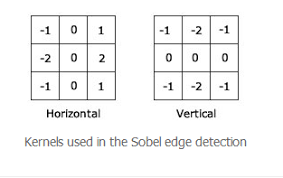

In [ ]:
from IPython.display import Image
Image(filename='F:\\Digital image processing\\Labs\\sobel.PNG')

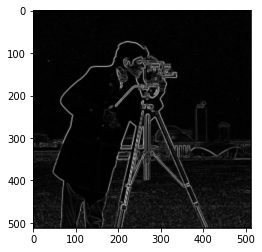

In [ ]:
#sobel filtering:

smooth_image = filters.sobel(img)
plt.imshow(smooth_image, cmap=plt.cm.gray);

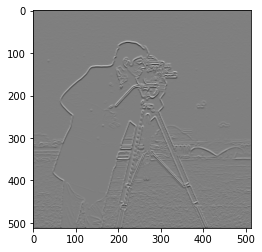

In [ ]:
# This filter highlights the horizontal edges of an image:

horizontal_edge_response = convolve(smooth_image, horizontal_edge_kernel)
plt.imshow(horizontal_edge_response, cmap=plt.cm.gray);


# Task2: Implement above Convolution function that can take any image size and any kernel size

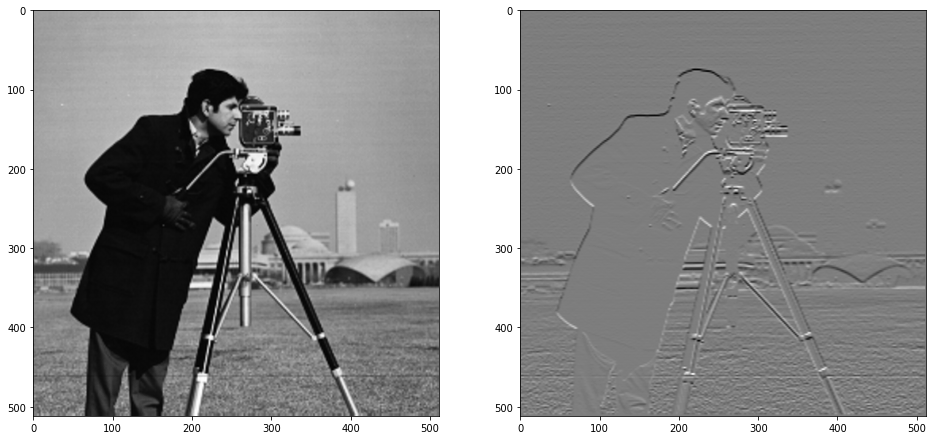

In [ ]:
def Conv(img,kernel):
    img1 = np.zeros(img.shape)
    irow = img1.shape[0]
    icolumn = img1.shape[1]
    krow = kernel.shape[0]
    kcolumn = kernel.shape[1]
    for i in range(krow//2,irow-(krow//2)):
      for j in range(kcolumn//2,icolumn-(kcolumn//2)):
        sum=0
        for k in range(-(krow//2),(krow//2)+1):
          for l in range(-(kcolumn//2),(kcolumn//2)+1):
            sum += (img[i+k][j+l])*kernel[k][l]
        img1[i][j] = sum
    return img1 


fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow( data.camera() ,'gray')
ax2.imshow( Conv(data.camera(),horizontal_edge_kernel) ,'gray')
plt.show()

# Display Laplace for Edge detection and show the result.

### Lablace filter:
    Laplacian filter kernels usually contain negative values in a cross pattern, centered within the array. The corners are either zero or positive values. The center value can be either negative or positive. The following array is an example of a 3x3 kernel for a Laplacian filter.

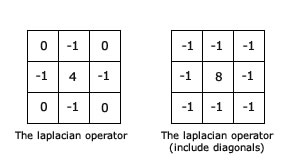

In [ ]:
from IPython.display import Image
Image(filename='F:\\Digital image processing\\Labs\\lablace.PNG')

/home/apro/anaconda3/lib/python3.6/site-packages/skimage/restoration/uft.py:447: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  impr[([slice(1, 2)] * ndim)] = 2.0 * ndim


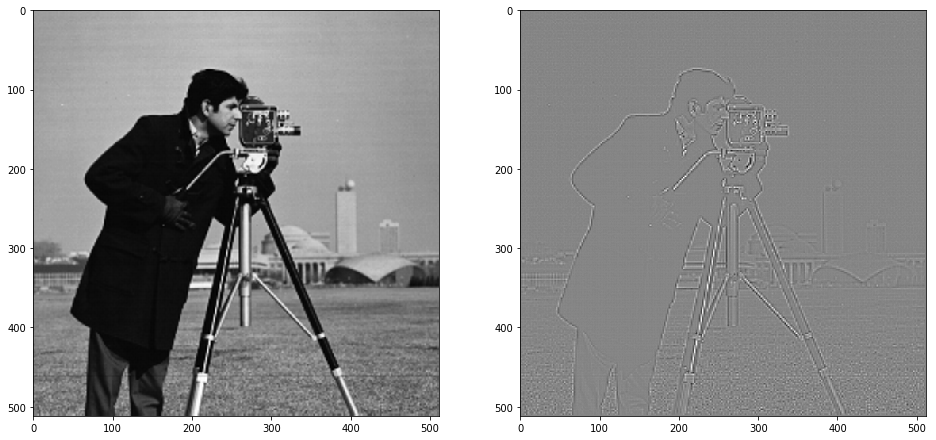

In [ ]:
ImgNew  = laplace(img)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow(img,'gray')
ax2.imshow(ImgNew,'gray')
plt.show()   

# Task3: Implement above Laplace filter function to your image?

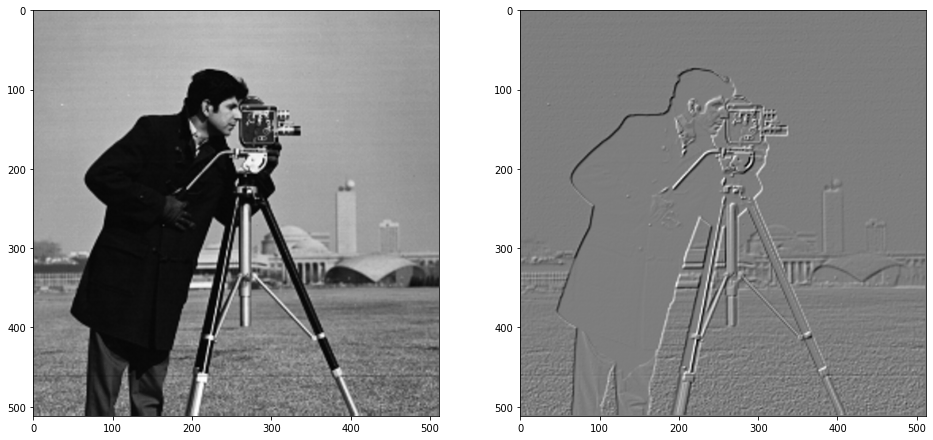

In [ ]:
laplace_kernel = np.array([[ -1, -1,  -1],
                                   [ -1,  8,  -1],
                                   [ -1, -1,  -1]])

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow( data.camera() ,'gray')
ax2.imshow( Conv(data.camera(), laplace_kernel) ,'gray')
plt.show()

# Display sharpening image using Laplace and the Gradient.

/home/apro/anaconda3/lib/python3.6/site-packages/skimage/restoration/uft.py:447: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  impr[([slice(1, 2)] * ndim)] = 2.0 * ndim


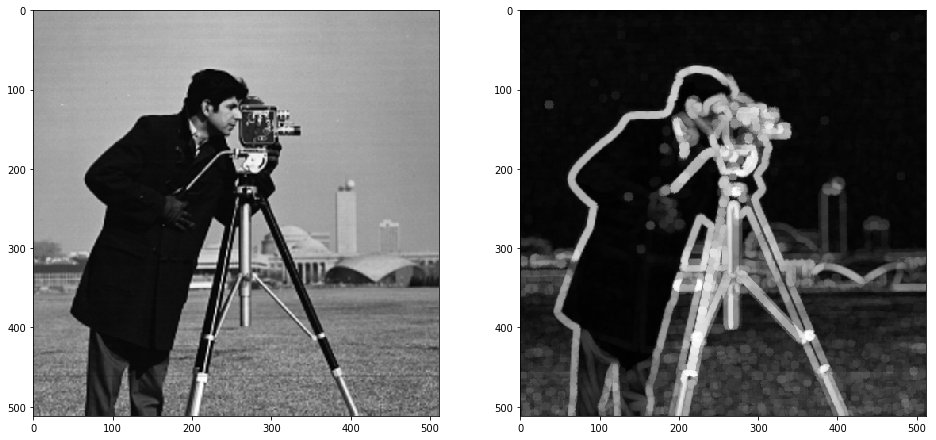

In [ ]:
ImgNew  = laplace(img)
ImgNew = gradient(img,disk(5))
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.imshow(img,'gray')
ax2.imshow(ImgNew,'gray')
plt.show()   